# Data visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, acf, pacf, plot_pacf

import sys
import os

from satprod.data_handlers.num_data import NumericalDataHandler
from satprod.pipelines.dataset import WindDataset
from satprod.configs.job_configs import TrainConfig, DataConfig
from satprod.data_handlers.data_utils import get_columns
from datetime import timedelta

pd.set_option('display.max_rows', 200)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

from matplotlib import cycler
colors = cycler('color',
                ['#00C700', '#1F3DFF', '#4FFF57', '#000066',
                 '#F2D42E', '#FF5924', '#C4000D', '#FFA6BD',
                 '#FF2459', '#540AFF'])

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray', labelsize=20)
plt.rc('ytick', direction='out', color='gray', labelsize=20)
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
park_name = {
    'bess': 'Bessakerfjellet', 
    'skom': 'Skomakerfjellet', 
    'vals': 'Valsneset', 
    'yvik': 'Ytre Vikna'
}

# Load data

In [3]:
num = NumericalDataHandler()
parks = ['bess', 'skom', 'vals', 'yvik']

In [4]:
wind_df = num.get_wind_data()
prod_df = num.get_prod_data()

## Comparison of MEPS and Meteomatics

In [5]:
old_wind_df = num.read_old_formatted_data(nan=True)

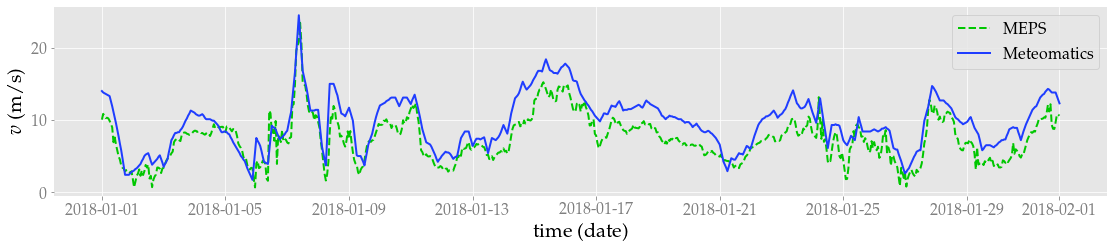

In [6]:
plt.figure(figsize=(16,4))
plt.plot(old_wind_df.wind_speed_bess.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].index,
         old_wind_df.wind_speed_bess.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].values,
        label='MEPS', linestyle='--')
plt.plot(wind_df.wind_speed_bess.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].index,
         wind_df.wind_speed_bess.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].values,
        label='Meteomatics')
plt.legend()
plt.ylabel(r'$v$ (m/s)')
plt.xlabel('time (date)')
#plt.title(r'Wind speed $v$ predicted by MEPS and Meteomatics at Bessakerfjellet')
plt.tight_layout()
plt.savefig('comparison_speed.png')
plt.show()

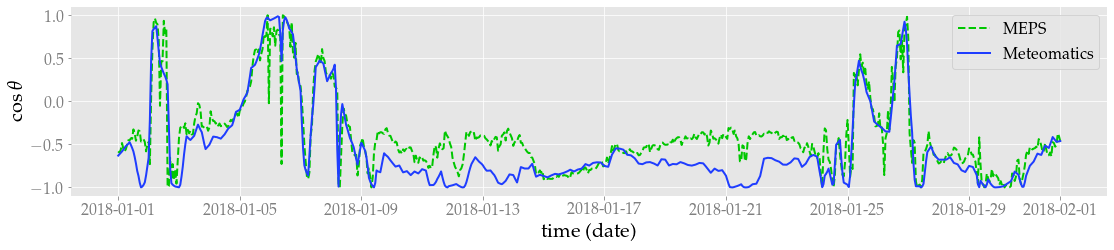

In [7]:
plt.figure(figsize=(16,4))
plt.plot(old_wind_df.wind_direction_bess_cos.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].index,
         old_wind_df.wind_direction_bess_cos.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].values,
        label='MEPS', linestyle='--')
        #color='c')
plt.plot(wind_df.wind_direction_bess_cos.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].index,
         wind_df.wind_direction_bess_cos.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].values,
        label='Meteomatics')
        #color='m')
plt.legend()
plt.ylabel(r'$\cos{\theta}$')
plt.xlabel('time (date)')
#plt.title(r'Cosine of the wind direction $\theta$ predicted by MEPS and Meteomatics at Bessakerfjellet')
plt.tight_layout()
plt.savefig('comparison_cos.png')
plt.show()

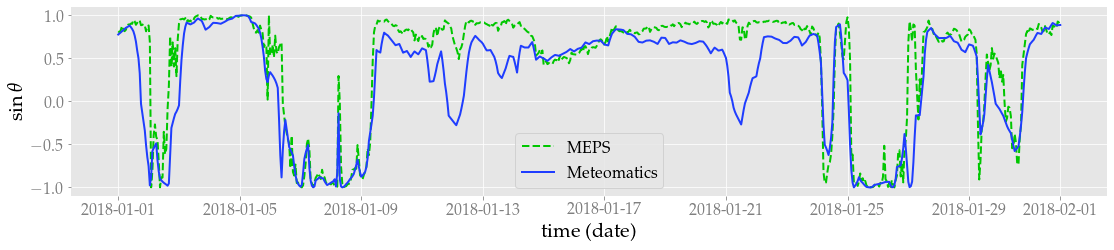

In [8]:
plt.figure(figsize=(16,4))
plt.plot(old_wind_df.wind_direction_bess_sin.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].index,
         old_wind_df.wind_direction_bess_sin.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].values,
        label='MEPS', linestyle='--')
        #color='c')
plt.plot(wind_df.wind_direction_bess_sin.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].index,
         wind_df.wind_direction_bess_sin.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].values,
        label='Meteomatics')
        #color='m')
plt.legend()
plt.ylabel(r'$\sin{\theta}$')
plt.xlabel('time (date)')
#plt.title(r'Sine of the wind direction $\theta$ predicted by MEPS and Meteomatics at Bessakerfjellet')
plt.tight_layout()
plt.savefig('comparison_sin.png')
plt.show()
#wind_df.wind_direction_bess_sin.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'].plot()

# Display frames

In [9]:
wind_df

,wind_speed_bess,wind_speed_vals,wind_speed_yvik,wind_direction_bess_cos,wind_direction_bess_sin,wind_direction_vals_cos,wind_direction_vals_sin,wind_direction_yvik_cos,wind_direction_yvik_sin,wind_speed_bess+1h,...,wind_direction_yvik_cos+1h,wind_direction_yvik_cos+2h,wind_direction_yvik_cos+3h,wind_direction_yvik_cos+4h,wind_direction_yvik_cos+5h,wind_direction_yvik_sin+1h,wind_direction_yvik_sin+2h,wind_direction_yvik_sin+3h,wind_direction_yvik_sin+4h,wind_direction_yvik_sin+5h
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,10.3,11.8,11.8,-0.600420,0.799685,-0.594823,0.803857,-0.579281,0.815128,10.2,...,-0.550481,-0.534352,-0.518027,-0.460200,-0.427358,0.834848,0.845262,0.855364,0.887815,0.904083
2006-01-01 01:00:00,10.2,11.9,11.4,-0.577858,0.816138,-0.559193,0.829038,-0.550481,0.834848,10.2,...,-0.534352,-0.518027,-0.460200,-0.427358,-0.417867,0.845262,0.855364,0.887815,0.904083,0.908508
2006-01-01 02:00:00,10.2,12.3,11.3,-0.573576,0.819152,-0.560639,0.828060,-0.534352,0.845262,9.7,...,-0.518027,-0.460200,-0.427358,-0.417867,-0.371368,0.855364,0.887815,0.904083,0.908508,0.928486
2006-01-01 03:00:00,9.7,11.9,10.9,-0.560639,0.828060,-0.582123,0.813101,-0.518027,0.855364,8.9,...,-0.460200,-0.427358,-0.417867,-0.371368,-0.310676,0.887815,0.904083,0.908508,0.928486,0.950516
2006-01-01 04:00:00,8.9,11.0,9.8,-0.512043,0.858960,-0.547563,0.836764,-0.460200,0.887815,9.1,...,-0.427358,-0.417867,-0.371368,-0.310676,-0.289032,0.904083,0.908508,0.928486,0.950516,0.957319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17 19:00:00,2.7,3.8,6.4,0.744312,0.667833,0.449319,0.893371,0.567844,0.823136,3.1,...,0.576432,0.720551,0.894934,0.954761,NaN,0.817145,0.693402,0.446198,0.297375,NaN
2021-05-17 20:00:00,3.1,3.2,7.2,0.955793,0.294040,0.211325,0.977416,0.576432,0.817145,3.3,...,0.720551,0.894934,0.954761,NaN,NaN,0.693402,0.446198,0.297375,NaN,NaN
2021-05-17 21:00:00,3.3,2.1,7.1,0.986286,0.165048,0.130526,0.991445,0.720551,0.693402,3.1,...,0.894934,0.954761,NaN,NaN,NaN,0.446198,0.297375,NaN,NaN,NaN


In [10]:
wind_df.columns

Index(['wind_speed_bess', 'wind_speed_vals', 'wind_speed_yvik',
       'wind_direction_bess_cos', 'wind_direction_bess_sin',
       'wind_direction_vals_cos', 'wind_direction_vals_sin',
       'wind_direction_yvik_cos', 'wind_direction_yvik_sin',
       'wind_speed_bess+1h', 'wind_speed_bess+2h', 'wind_speed_bess+3h',
       'wind_speed_bess+4h', 'wind_speed_bess+5h', 'wind_speed_vals+1h',
       'wind_speed_vals+2h', 'wind_speed_vals+3h', 'wind_speed_vals+4h',
       'wind_speed_vals+5h', 'wind_speed_yvik+1h', 'wind_speed_yvik+2h',
       'wind_speed_yvik+3h', 'wind_speed_yvik+4h', 'wind_speed_yvik+5h',
       'wind_direction_bess_cos+1h', 'wind_direction_bess_cos+2h',
       'wind_direction_bess_cos+3h', 'wind_direction_bess_cos+4h',
       'wind_direction_bess_cos+5h', 'wind_direction_bess_sin+1h',
       'wind_direction_bess_sin+2h', 'wind_direction_bess_sin+3h',
       'wind_direction_bess_sin+4h', 'wind_direction_bess_sin+5h',
       'wind_direction_vals_cos+1h', 'wind_direction_

In [11]:
wind_df_no_forecasts = wind_df.drop(columns=get_columns(wind_df, '+').columns)

In [12]:
wind_df_no_forecasts

,wind_speed_bess,wind_speed_vals,wind_speed_yvik,wind_direction_bess_cos,wind_direction_bess_sin,wind_direction_vals_cos,wind_direction_vals_sin,wind_direction_yvik_cos,wind_direction_yvik_sin
time,,,,,,,,,
2006-01-01 00:00:00,10.3,11.8,11.8,-0.600420,0.799685,-0.594823,0.803857,-0.579281,0.815128
2006-01-01 01:00:00,10.2,11.9,11.4,-0.577858,0.816138,-0.559193,0.829038,-0.550481,0.834848
2006-01-01 02:00:00,10.2,12.3,11.3,-0.573576,0.819152,-0.560639,0.828060,-0.534352,0.845262
2006-01-01 03:00:00,9.7,11.9,10.9,-0.560639,0.828060,-0.582123,0.813101,-0.518027,0.855364
2006-01-01 04:00:00,8.9,11.0,9.8,-0.512043,0.858960,-0.547563,0.836764,-0.460200,0.887815
...,...,...,...,...,...,...,...,...,...
2021-05-17 19:00:00,2.7,3.8,6.4,0.744312,0.667833,0.449319,0.893371,0.567844,0.823136
2021-05-17 20:00:00,3.1,3.2,7.2,0.955793,0.294040,0.211325,0.977416,0.576432,0.817145
2021-05-17 21:00:00,3.3,2.1,7.1,0.986286,0.165048,0.130526,0.991445,0.720551,0.693402


In [13]:
prod_df.production_bess.dropna(axis=0)

time
2008-07-24 00:00:00    13.780083
2008-07-24 01:00:00    10.538997
2008-07-24 02:00:00     7.448241
2008-07-24 03:00:00     6.088858
2008-07-24 04:00:00     4.831747
                         ...    
2021-05-27 19:00:00     4.484777
2021-05-27 20:00:00     2.580539
2021-05-27 21:00:00     2.682691
2021-05-27 22:00:00     5.821474
2021-05-27 23:00:00     5.990712
Name: production_bess, Length: 112519, dtype: float64

# Plot data

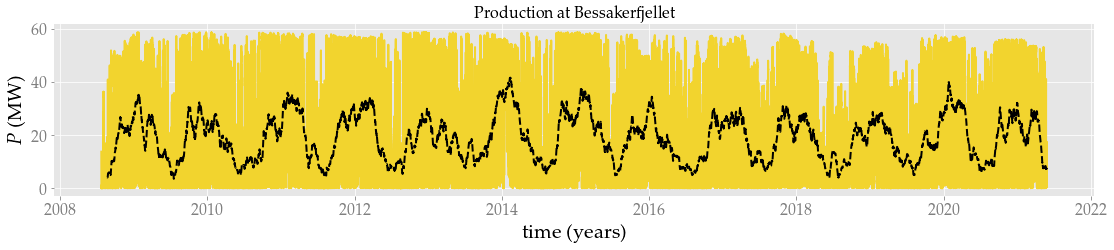

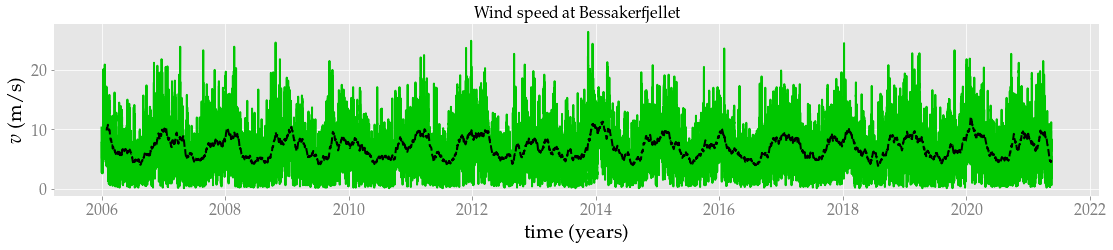

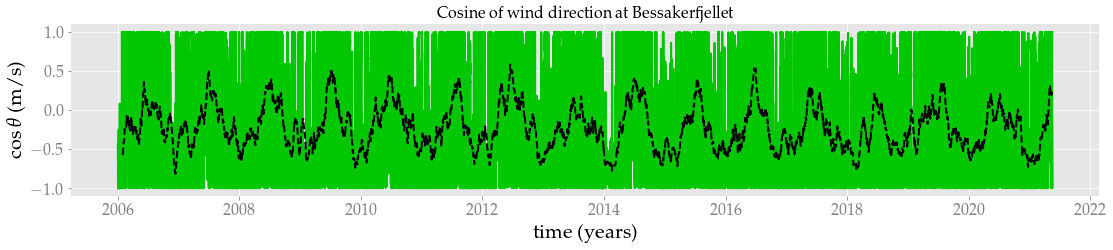

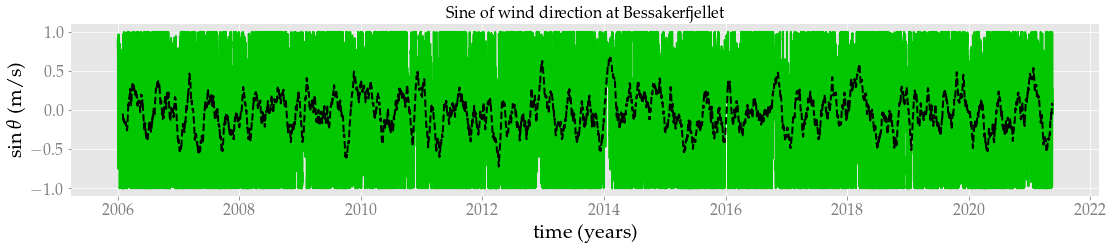

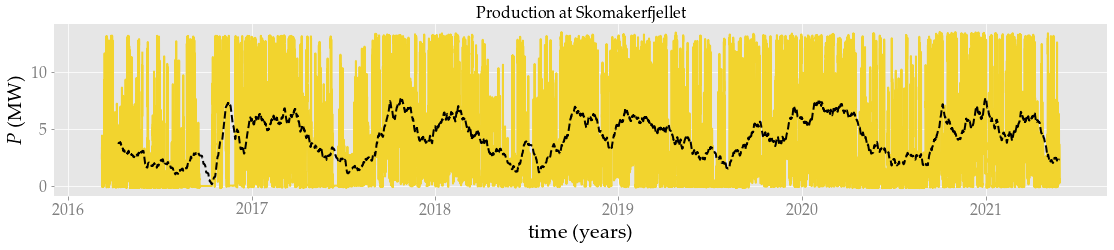

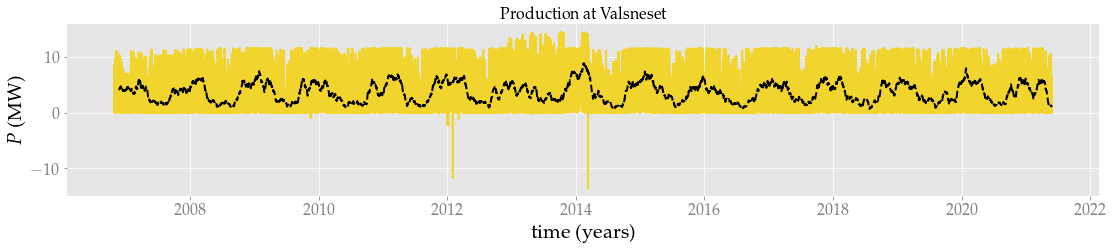

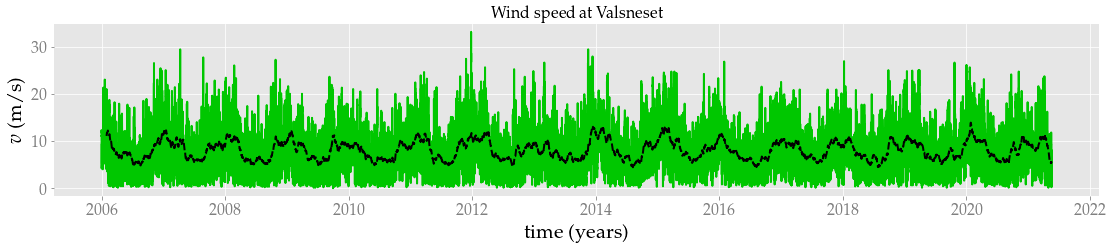

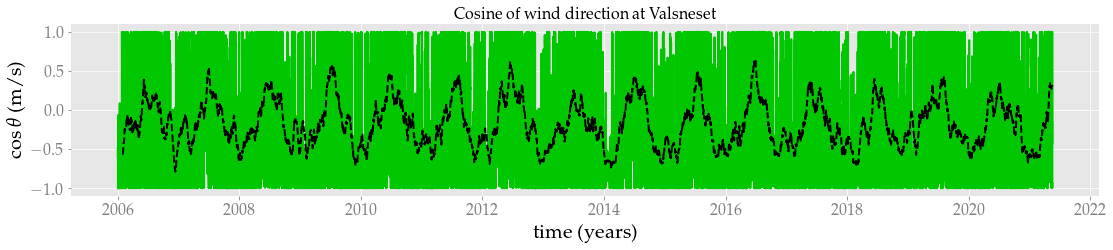

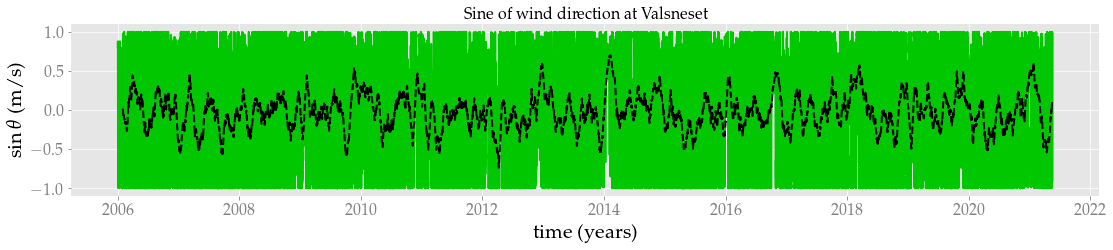

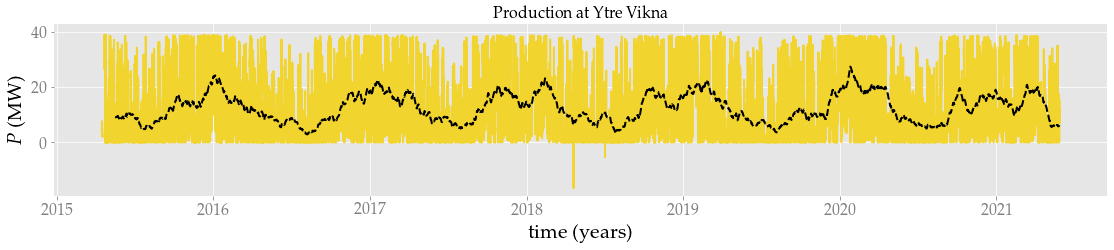

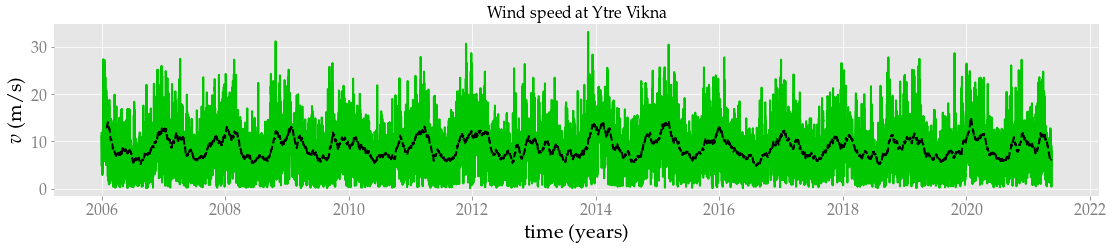

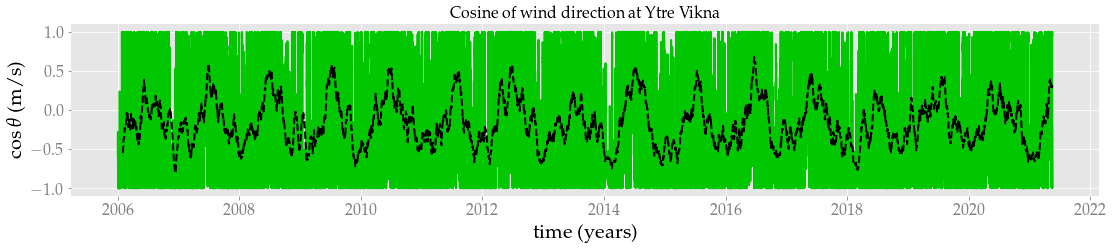

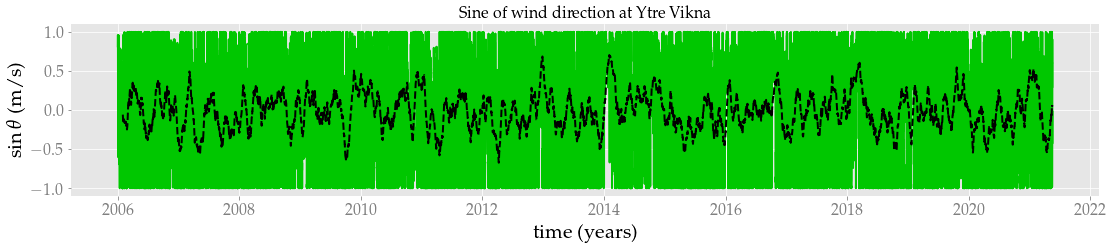

In [14]:
rolling_factor = 30*24

for park in parks:
    plt.figure(figsize=(16, 4))
    plt.plot(prod_df[f'production_{park}'], color='#F2D42E')
    plt.plot(prod_df[f'production_{park}'].dropna(axis=0).index, 
         prod_df[f'production_{park}'].dropna(axis=0).rolling(
             rolling_factor).mean(), linestyle='--', color='#000000')
    plt.title(f'Production at {park_name[park]}')
    plt.ylabel(r'$P$ (MW)')
    plt.xlabel('time (years)')
    plt.tight_layout()
    plt.savefig(f'production_{park}.png')
    plt.show()
    
    if park=='skom': 
        continue
    
    plt.figure(figsize=(16, 4))
    plt.plot(wind_df[f'wind_speed_{park}'])
    plt.plot(wind_df[f'wind_speed_{park}'].dropna(axis=0).index, 
         wind_df[f'wind_speed_{park}'].dropna(axis=0).rolling(
             rolling_factor).mean(), linestyle='--', color='#000000')
    plt.title(f'Wind speed at {park_name[park]}')
    plt.ylabel(r'$v$ (m/s)')
    plt.xlabel('time (years)')
    plt.tight_layout()
    plt.savefig(f'wind_speed_{park}.png')
    plt.show()

    plt.figure(figsize=(16, 4))
    plt.plot(wind_df[f'wind_direction_{park}_cos'])
    plt.plot(wind_df[f'wind_direction_{park}_cos'].dropna(axis=0).index, 
         wind_df[f'wind_direction_{park}_cos'].dropna(axis=0).rolling(
             rolling_factor).mean(), linestyle='--', color='#000000')
    plt.title(f'Cosine of wind direction at {park_name[park]}')
    plt.ylabel(r'$\cos{\theta}$ (m/s)')
    plt.xlabel('time (years)')
    plt.tight_layout()
    plt.savefig(f'wind_direction_{park}_cos.png')
    plt.show()

    plt.figure(figsize=(16, 4))
    plt.plot(wind_df[f'wind_direction_{park}_sin'])
    plt.plot(wind_df[f'wind_direction_{park}_sin'].dropna(axis=0).index, 
         wind_df[f'wind_direction_{park}_sin'].dropna(axis=0).rolling(
             rolling_factor).mean(), linestyle='--', color='#000000')
    plt.title(f'Sine of wind direction at {park_name[park]}')
    plt.ylabel(r'$\sin{\theta}$ (m/s)')
    plt.xlabel('time (years)')
    plt.tight_layout()
    plt.savefig(f'wind_direction_{park}_sin.png')
    plt.show()

In [15]:
for park in parks:
    print(park)
    print('start:', prod_df[f'production_{park}'].dropna(axis=0).index[0])
    print('stop:', prod_df[f'production_{park}'].dropna(axis=0).index[-1])
    print(len(prod_df[f'production_{park}'].dropna(axis=0)), '\n')

bess
start: 2008-07-24 00:00:00
stop: 2021-05-27 23:00:00
112519 

skom
start: 2016-03-09 00:00:00
stop: 2021-05-27 23:00:00
45377 

vals
start: 2006-10-27 00:00:00
stop: 2021-05-27 23:00:00
127209 

yvik
start: 2015-04-16 10:00:00
stop: 2021-05-27 23:00:00
53249 



# Remove outliers

In [16]:
for park in parks:
    start = prod_df[f'production_{park}'].dropna(axis=0).index[0]
    end = prod_df[f'production_{park}'].dropna(axis=0).index[-1]
    prod_df[f'production_{park}'].loc[:start+timedelta(hours=24*183-1)] = np.nan

In [17]:
for park in parks:
    print(park)
    print('start:', prod_df[f'production_{park}'].dropna(axis=0).index[0])
    print('stop:', prod_df[f'production_{park}'].dropna(axis=0).index[-1])
    print(len(prod_df[f'production_{park}'].dropna(axis=0)), '\n')

bess
start: 2009-01-23 00:00:00
stop: 2021-05-27 23:00:00
108127 

skom
start: 2016-09-08 00:00:00
stop: 2021-05-27 23:00:00
41192 

vals
start: 2007-04-28 00:00:00
stop: 2021-05-27 23:00:00
122826 

yvik
start: 2015-10-16 10:00:00
stop: 2021-05-27 23:00:00
48904 



In [18]:
prod_df.production_vals[prod_df.production_vals < -0.1]

time
2009-11-16 05:00:00    -0.973684
2012-01-03 11:00:00    -1.913882
2012-01-03 12:00:00    -1.830743
2012-01-03 13:00:00    -2.272483
2012-01-03 14:00:00    -1.480063
2012-01-03 15:00:00    -0.933218
2012-01-03 16:00:00    -0.683802
2012-01-03 17:00:00    -0.779313
2012-01-03 18:00:00    -0.308966
2012-01-03 19:00:00    -0.270381
2012-01-03 23:00:00    -0.162270
2012-01-04 00:00:00    -0.113027
2012-01-04 03:00:00    -0.174653
2012-01-04 05:00:00    -0.497117
2012-01-04 06:00:00    -0.742639
2012-01-04 07:00:00    -0.329374
2012-01-04 08:00:00    -0.265476
2012-01-04 09:00:00    -0.531674
2012-01-04 10:00:00    -0.732353
2012-01-04 11:00:00    -0.735978
2012-01-04 12:00:00    -0.536146
2012-01-04 13:00:00    -0.358105
2012-01-04 14:00:00    -0.380713
2012-01-04 15:00:00    -0.339205
2012-01-04 16:00:00    -0.276722
2012-01-04 17:00:00    -0.214115
2012-01-04 18:00:00    -0.160793
2012-01-04 19:00:00    -0.187119
2012-01-05 05:00:00    -0.109516
2012-01-05 06:00:00    -0.228564
2012-

In [19]:
prod_df.production_skom[prod_df.production_skom < -0.23]

Series([], Freq: H, Name: production_skom, dtype: float64)

In [20]:
prod_df.production_yvik[prod_df.production_yvik < -0.01]

time
2017-12-06 11:00:00    -0.096000
2018-04-20 13:00:00   -16.594824
2018-07-02 22:00:00    -5.376000
2018-07-02 23:00:00    -3.840000
Name: production_yvik, dtype: float64

In [21]:
prod_df.production_bess[prod_df.production_bess < 0.0]

time
2017-08-31 16:00:00   -2.743031e-16
2017-09-02 17:00:00   -4.367949e-03
Name: production_bess, dtype: float64

<AxesSubplot:xlabel='time'>

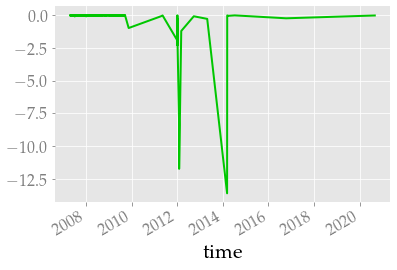

In [22]:
prod_df.production_vals[prod_df.production_vals < 0].plot()

In [23]:
limits = {'bess': 0.0, 'vals': -0.1, 'skom': -0.23, 'yvik': -0.01}
for col in prod_df.columns:
    park = col.split('_')[-1]
    prod_df[col][prod_df[col] < limits[park]] = np.nan

### Remove period where Vals production is higher than usual

<AxesSubplot:xlabel='time'>

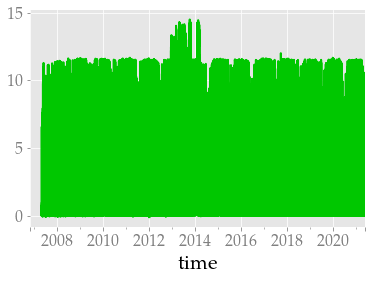

In [24]:
prod_df.production_vals.plot()

In [25]:
max_production_vals = prod_df.production_vals.iloc[-24*365*5:].max() # find max production over last five years
print(max_production_vals)
max_values_vals = prod_df.production_vals[prod_df.production_vals > max_production_vals]

12.0


In [26]:
max_values_vals

time
2012-12-14 09:00:00    12.028322
2012-12-14 10:00:00    12.198446
2012-12-14 13:00:00    12.463381
2012-12-14 14:00:00    12.430157
2012-12-14 15:00:00    12.460974
                         ...    
2014-03-09 18:00:00    12.557472
2014-03-09 21:00:00    13.585054
2014-03-10 02:00:00    13.513401
2014-03-10 03:00:00    13.712370
2014-03-10 04:00:00    14.091042
Name: production_vals, Length: 500, dtype: float64

In [27]:
prod_df.production_vals = pd.concat([
    prod_df.production_vals[:max_values_vals.index[0]-timedelta(hours=1)],
    prod_df.production_vals[max_values_vals.index[-1]+timedelta(hours=1):]
], axis=0)

In [28]:
prod_df.production_vals.asfreq('H').loc[max_values_vals.index[0]:max_values_vals.index[-1]]

time
2012-12-14 09:00:00   NaN
2012-12-14 10:00:00   NaN
2012-12-14 11:00:00   NaN
2012-12-14 12:00:00   NaN
2012-12-14 13:00:00   NaN
                       ..
2014-03-10 00:00:00   NaN
2014-03-10 01:00:00   NaN
2014-03-10 02:00:00   NaN
2014-03-10 03:00:00   NaN
2014-03-10 04:00:00   NaN
Freq: H, Name: production_vals, Length: 10820, dtype: float64

<AxesSubplot:xlabel='time'>

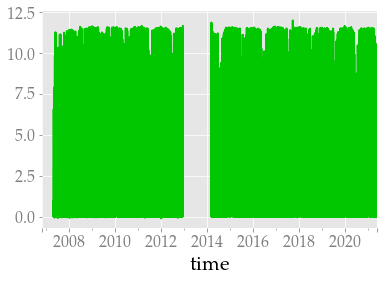

In [29]:
prod_df.production_vals.plot()

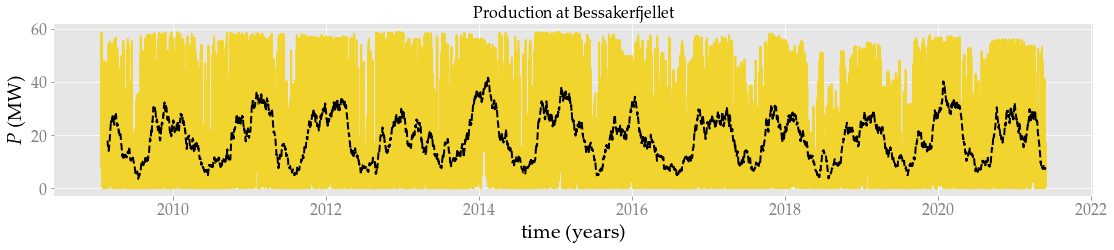

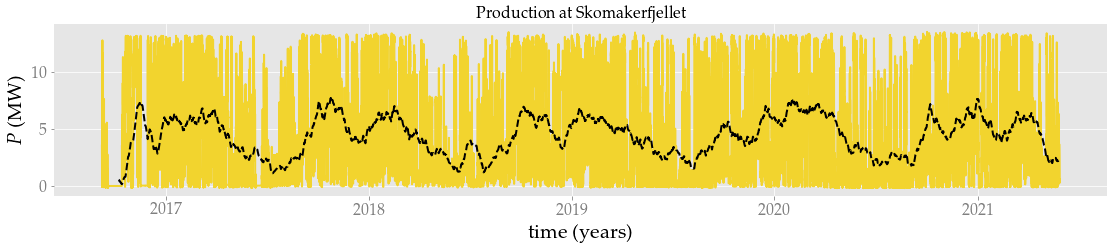

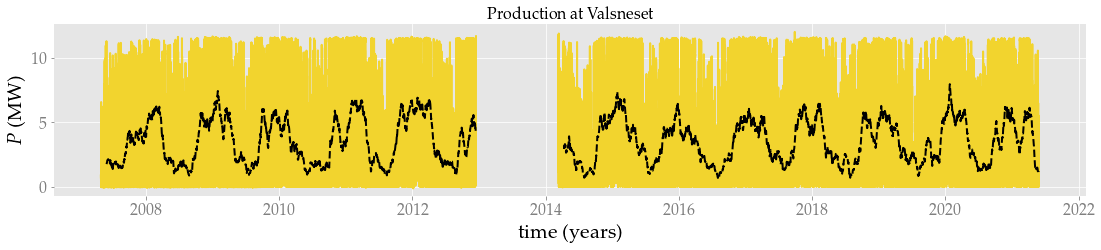

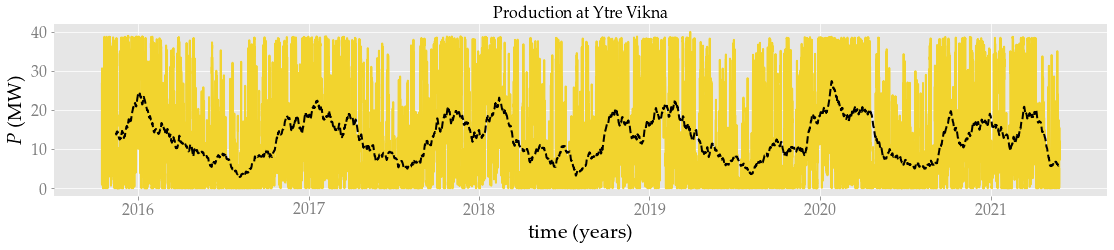

In [30]:
rolling_factor = 30*24

for park in parks:
    plt.figure(figsize=(16, 4))
    plt.plot(prod_df[f'production_{park}'], color='#F2D42E')
    if park=='vals':
        plt.plot(prod_df[f'production_{park}'].loc[:'2012-12-14 08:00:00'].dropna(axis=0).index, 
             prod_df[f'production_{park}'].loc[:'2012-12-14 08:00:00'].dropna(axis=0).rolling(
                 rolling_factor).mean(), linestyle='--', color='#000000')

        plt.plot(prod_df[f'production_{park}'].loc['2014-03-10 05:00:00':].dropna(axis=0).index, 
             prod_df[f'production_{park}'].loc['2014-03-10 05:00:00':].dropna(axis=0).rolling(
                 rolling_factor).mean(), linestyle='--', color='#000000')
    else:
        plt.plot(prod_df[f'production_{park}'].dropna(axis=0).index, 
             prod_df[f'production_{park}'].dropna(axis=0).rolling(
                 rolling_factor).mean(), linestyle='--', color='#000000')
    
    plt.title(f'Production at {park_name[park]}')
    plt.ylabel(r'$P$ (MW)')
    plt.xlabel('time (years)')
    plt.tight_layout()
    plt.savefig(f'production_{park}_cleaned.png')
    plt.show()

# Missing values

In [31]:
def null_data(df):
    return df[df.isnull().any(axis=1)]

In [32]:
for park in parks:
    print(park)
    print('start:', prod_df[f'production_{park}'].dropna(axis=0).index[0])
    print('stop:', prod_df[f'production_{park}'].dropna(axis=0).index[-1])
    print(len(prod_df[f'production_{park}'].dropna(axis=0)), '\n')

bess
start: 2009-01-23 00:00:00
stop: 2021-05-27 23:00:00
108125 

skom
start: 2016-09-08 00:00:00
stop: 2021-05-27 23:00:00
41192 

vals
start: 2007-04-28 00:00:00
stop: 2021-05-27 23:00:00
111943 

yvik
start: 2015-10-16 10:00:00
stop: 2021-05-27 23:00:00
48900 



Given the amount of production data above, the splits clearly needs to be done differently for the different parks. However, if transfer learning is to be used for the extraction of image features, all the parks should have the same test set. Disregarding Ytre Vikna due to its lack of recent production data, the test set can be considered to be the most recent year of available data. Since the amount of data at Skomakerfjellet wind park is not that large, having a larger validation set than one year could impair the training quality at that park. Due to a limited amount of time, along with a large amount of data, a cross-validation for hyperparameter tuning and feature selection is not performed. In addition, the first period after a park has started producing power, it is likely that changes are imposed, making this data unrepresentable for the future production. Therefore, the first half year of each production data is removed. Also, the images are only available until 2021-05-12 00:00:00. These considerations lead to the following split:

bess
90288
8
0

skom
23448
85
68

vals
105552
11490
11406

yvik
31310
266
209

Training set:
- (bess) 2009-01-23 00:00:00 to 2019-05-12 23:00:00 
    - Length: 90384
    - Missing values: 8
    - Missing values with neighboring missing values: 0
- (skom) 2016-09-08 00:00:00 to 2019-05-12 23:00:00
    - Length: 23544
    - Missing values: 85
    - Missing values with neighboring missing values: 68
- (vals) 2007-04-28 00:00:00 to 2019-05-12 23:00:00
    - Length: 105696
    - Missing values: 11490
    - Missing values with neighboring missing values: 11406
- (yvik) 2015-10-16 10:00:00 to 2019-05-12 23:00:00 (if recent production data becomes available)
    - Length: 54144
    - Missing values: 266
    - Missing values with neighboring missing values: 209
    - Same data but after removal of long nan period:
        - Length: 54144-1435
        - Missing values: 3915-1435
        - Missing values with neighboring missing values: 3611-1434

Validation set: 2019-05-12 00:00:00 to 2020-05-11 23:00:00

Test set: 2020-05-12 00:00:00 to 2021-05-12 00:00:00

In [33]:
start_dates = {
    'bess': '2009-01-23 00:00:00', 
    'skom': '2016-09-08 00:00:00', 
    'vals': '2007-04-28 00:00:00',
    'yvik': '2015-10-16 10:00:00'
}

end_dates = {
    'bess': '2019-05-12 23:00:00', 
    'skom': '2019-05-12 23:00:00', 
    'vals': '2019-05-12 23:00:00',
    'yvik': '2019-05-12 23:00:00'
}

for park in parks:
    print(f'\n{park}')
    print(len(prod_df[f'production_{park}'].loc[
        start_dates[park]:end_dates[park]
    ]))
    print(len(null_data(pd.DataFrame(data=prod_df[f'production_{park}'].loc[
        start_dates[park]:end_dates[park]
    ]))))
    print(len(null_data(pd.DataFrame(
        data=prod_df[f'production_{park}'].loc[
            start_dates[park]:end_dates[park]
        ].interpolate(limit=1)))))


bess
90288
8
0

skom
23448
85
68

vals
105552
11465
11380

yvik
31310
266
209


In [34]:
park = 'vals'
null_df = null_data(pd.DataFrame(data=prod_df[f'production_{park}'].loc[
        start_dates[park]:end_dates[park]
    ]))

In [35]:
nan_period_lengths = []
old_index = null_df.index[0]
nan_period_length = 1
start_index = old_index
for index in null_df.index:
    if index > old_index + timedelta(seconds=3601):
        print(start_index, 'to', old_index, nan_period_length)
        nan_period_lengths.append(nan_period_length)
        nan_period_length = 1
        start_index = index
    else:
        nan_period_length += 1
    old_index = index

2007-05-15 19:00:00 to 2007-05-15 21:00:00 4
2007-05-19 00:00:00 to 2007-05-19 10:00:00 11
2007-05-24 16:00:00 to 2007-05-24 21:00:00 6
2007-05-25 14:00:00 to 2007-05-25 14:00:00 1
2007-08-25 22:00:00 to 2007-08-26 08:00:00 11
2007-09-08 02:00:00 to 2007-09-08 02:00:00 1
2007-09-24 03:00:00 to 2007-09-24 04:00:00 2
2007-10-25 02:00:00 to 2007-10-25 02:00:00 1
2008-01-16 17:00:00 to 2008-01-16 17:00:00 1
2008-02-19 17:00:00 to 2008-02-19 19:00:00 3
2008-03-02 12:00:00 to 2008-03-02 12:00:00 1
2008-04-16 12:00:00 to 2008-04-16 12:00:00 1
2008-05-19 06:00:00 to 2008-05-19 08:00:00 3
2008-11-27 12:00:00 to 2008-11-27 12:00:00 1
2009-04-04 11:00:00 to 2009-04-04 13:00:00 3
2009-11-16 05:00:00 to 2009-11-16 05:00:00 1
2010-02-08 09:00:00 to 2010-02-08 09:00:00 1
2010-02-11 08:00:00 to 2010-02-11 08:00:00 1
2010-03-03 12:00:00 to 2010-03-03 12:00:00 1
2010-03-17 09:00:00 to 2010-03-17 11:00:00 3
2010-05-04 17:00:00 to 2010-05-04 21:00:00 5
2010-09-02 13:00:00 to 2010-09-02 13:00:00 1
2010-09-

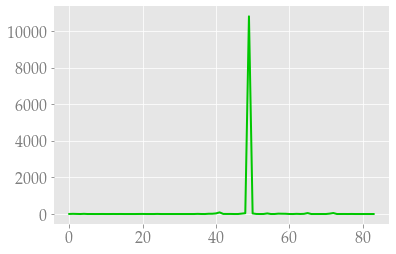

In [36]:
plt.plot(nan_period_lengths)

Looking at how the missing values are distributed, a linear model should be created to fill in the isolated missing values. The gain in the number of sequences (sequence_length + pred_sequence_length) by filling in such an isolated value, is essential, while the model is not very disturbed by seeing one approximated value rather than a real one. Therefore, all isolated NaN values and isolated pairs of NaN values will be filled using a linear model.

NB! Do not fill any NaN values in the validation or test set.

### Missing images

In [37]:
grid_df = pd.DataFrame(data=pd.read_csv(f'{num.formatted_data_path}/img_data.csv')['grid'])
formatted = num.read_formatted_data(nan=True)

In [38]:
grid_df['time'] = formatted.index[:len(grid_df)]
grid_df['time'] = pd.to_datetime(grid_df['time'])
grid_df = grid_df.set_index('time')

In [39]:
null_grid_df = null_data(grid_df)
nan_period_lengths = []
old_index = null_grid_df.index[0]
nan_period_length = 1
start_index = old_index
for index in null_grid_df.index:
    if index > old_index + timedelta(seconds=3601):
        print(start_index, 'to', old_index, nan_period_length)
        nan_period_lengths.append(nan_period_length)
        nan_period_length = 1
        start_index = index
    else:
        nan_period_length += 1
    old_index = index

2013-01-01 01:00:00 to 2013-01-10 23:00:00 240
2014-01-01 01:00:00 to 2014-01-10 23:00:00 239
2015-01-01 01:00:00 to 2015-01-10 23:00:00 239


In [40]:
grid_df.loc['2013-01-01 01:00:00':'2013-01-10 23:00:00']

,grid
time,
2013-01-01 01:00:00,NaN
2013-01-01 02:00:00,NaN
2013-01-01 03:00:00,NaN
2013-01-01 04:00:00,NaN
2013-01-01 05:00:00,NaN
...,...
2013-01-10 19:00:00,NaN
2013-01-10 20:00:00,NaN
2013-01-10 21:00:00,NaN


In [41]:
grid_df.dropna(axis=0)

,grid
time,
2006-01-01 00:00:00,0.0
2006-01-01 01:00:00,1.0
2006-01-01 02:00:00,2.0
2006-01-01 03:00:00,3.0
2006-01-01 04:00:00,4.0
...,...
2021-05-11 20:00:00,133919.0
2021-05-11 21:00:00,133920.0
2021-05-11 22:00:00,133921.0


In [42]:
df_full = get_columns(formatted, 'yvik')
df_full['grid'] = grid_df['grid']

In [43]:
df_full.columns

Index(['wind_speed_yvik', 'wind_direction_yvik_cos', 'wind_direction_yvik_sin',
       'wind_speed_yvik+1h', 'wind_speed_yvik+2h', 'wind_speed_yvik+3h',
       'wind_speed_yvik+4h', 'wind_speed_yvik+5h',
       'wind_direction_yvik_cos+1h', 'wind_direction_yvik_cos+2h',
       'wind_direction_yvik_cos+3h', 'wind_direction_yvik_cos+4h',
       'wind_direction_yvik_cos+5h', 'wind_direction_yvik_sin+1h',
       'wind_direction_yvik_sin+2h', 'wind_direction_yvik_sin+3h',
       'wind_direction_yvik_sin+4h', 'wind_direction_yvik_sin+5h',
       'production_yvik', 'grid'],
      dtype='object')

In [44]:
print(len(df_full.dropna(axis=0)))

48517


In [45]:
print(len(df_full.dropna(axis=0).asfreq('H'))-len(df_full.dropna(axis=0)))

314


In [46]:
print(
    (
    len(df_full.dropna(axis=0).asfreq('H'))-len(df_full.dropna(axis=0))
    )/len(df_full.dropna(axis=0).asfreq('H'))
)

0.006430341381499457


In [47]:
wind_df.drop(columns=get_columns(wind_df, '+')).asfreq('H').isna().sum()

wind_speed_bess            0
wind_speed_vals            0
wind_speed_yvik            0
wind_direction_bess_cos    0
wind_direction_bess_sin    0
wind_direction_vals_cos    0
wind_direction_vals_sin    0
wind_direction_yvik_cos    0
wind_direction_yvik_sin    0
dtype: int64

In [48]:
(40969-40809)#/40969

160

In [49]:
(45361-44994)/45361

0.008090650558850113

# Look at data after formatting and feature selection

In [50]:
formatted

,wind_speed_bess,wind_speed_vals,wind_speed_yvik,wind_direction_bess_cos,wind_direction_bess_sin,wind_direction_vals_cos,wind_direction_vals_sin,wind_direction_yvik_cos,wind_direction_yvik_sin,wind_speed_bess+1h,...,wind_direction_yvik_cos+5h,wind_direction_yvik_sin+1h,wind_direction_yvik_sin+2h,wind_direction_yvik_sin+3h,wind_direction_yvik_sin+4h,wind_direction_yvik_sin+5h,production_bess,production_skom,production_vals,production_yvik
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,10.3,11.8,11.8,-0.600420,0.799685,-0.594823,0.803857,-0.579281,0.815128,10.2,...,-0.427358,0.834848,0.845262,0.855364,0.887815,0.904083,NaN,NaN,NaN,NaN
2006-01-01 01:00:00,10.2,11.9,11.4,-0.577858,0.816138,-0.559193,0.829038,-0.550481,0.834848,10.2,...,-0.417867,0.845262,0.855364,0.887815,0.904083,0.908508,NaN,NaN,NaN,NaN
2006-01-01 02:00:00,10.2,12.3,11.3,-0.573576,0.819152,-0.560639,0.828060,-0.534352,0.845262,9.7,...,-0.371368,0.855364,0.887815,0.904083,0.908508,0.928486,NaN,NaN,NaN,NaN
2006-01-01 03:00:00,9.7,11.9,10.9,-0.560639,0.828060,-0.582123,0.813101,-0.518027,0.855364,8.9,...,-0.310676,0.887815,0.904083,0.908508,0.928486,0.950516,NaN,NaN,NaN,NaN
2006-01-01 04:00:00,8.9,11.0,9.8,-0.512043,0.858960,-0.547563,0.836764,-0.460200,0.887815,9.1,...,-0.289032,0.904083,0.908508,0.928486,0.950516,0.957319,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.484777,1.069517,2.745,7.166
2021-05-27 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.580539,0.746928,3.409,7.682
2021-05-27 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.682691,0.487000,3.045,10.516


In [51]:
data_config = DataConfig(
    model = 'TCN', 
    parks = ['bess', 'skom', 'vals', 'yvik'],
    numerical_features = ['production', 'direction', 'speed'], 
    use_img_features = True, 
    img_extraction_method = 'lenet',
    pred_sequence_length = 5,
    use_numerical_forecasts = True,
    use_img_forecasts = True,
    valid_start = {'year': 2019, 'month': 5, 'day': 12, 'hour': 0},
    test_start = {'year': 2020, 'month': 5, 'day': 12, 'hour': 0},
    test_end = {'year': 2021, 'month': 5, 'day': 11, 'hour': 23}
)
wind_dataset = WindDataset(data_config)

In [52]:
wind_dataset.data

,wind_speed_bess,wind_direction_bess_cos,wind_direction_bess_sin,wind_speed_bess+1h,wind_speed_bess+2h,wind_speed_bess+3h,wind_speed_bess+4h,wind_speed_bess+5h,wind_direction_bess_cos+1h,wind_direction_bess_cos+2h,...,wind_direction_yvik_sin+3h,wind_direction_yvik_sin+4h,wind_direction_yvik_sin+5h,production_yvik,grid,grid+1h,grid+2h,grid+3h,grid+4h,grid+5h
time,,,,,,,,,,,,,,,,,,,,,
2016-09-08 00:00:00,-0.170396,-0.154710,-0.987960,-0.361514,-0.552593,-0.743724,-0.825718,-0.935036,-0.277315,-0.430511,...,-0.969016,-0.972370,-0.976296,-0.427731,92955.0,92956.0,92957.0,92958.0,92959.0,92960.0
2016-09-08 01:00:00,-0.361495,-0.277315,-0.960779,-0.552584,-0.743643,-0.825600,-0.934884,-1.016910,-0.430511,-0.608761,...,-0.972370,-0.976296,-0.980271,-0.782586,92956.0,92957.0,92958.0,92959.0,92960.0,92961.0
2016-09-08 02:00:00,-0.552594,-0.430511,-0.902585,-0.743653,-0.825522,-0.934769,-1.016759,-1.098783,-0.608761,-0.728969,...,-0.976296,-0.980271,-0.961262,-0.958869,92957.0,92958.0,92959.0,92960.0,92961.0,92962.0
2016-09-08 03:00:00,-0.743692,-0.608761,-0.793353,-0.825540,-0.934694,-1.016645,-1.098633,-1.153366,-0.728969,-0.848972,...,-0.980271,-0.961262,-0.919135,-0.902750,92958.0,92959.0,92960.0,92961.0,92962.0,92963.0
2016-09-08 04:00:00,-0.825592,-0.728969,-0.684547,-0.934722,-1.016573,-1.098522,-1.153216,-1.235240,-0.848972,-0.946649,...,-0.961262,-0.919135,-0.811064,-0.891232,92959.0,92960.0,92961.0,92962.0,92963.0,92964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11 15:00:00,-1.589986,-0.364877,0.931056,-1.207678,-1.262209,-1.262274,-0.880301,-0.962327,-0.252069,-0.280667,...,0.708340,0.851727,0.731354,-1.066082,133914.0,133915.0,133916.0,133917.0,133918.0,133919.0
2021-05-11 16:00:00,-1.207789,-0.252069,0.967709,-1.262269,-1.262209,-0.880185,-0.962176,-0.935036,-0.280667,-0.776046,...,0.851727,0.731354,0.615661,-1.061056,133915.0,133916.0,133917.0,133918.0,133919.0,133920.0
2021-05-11 17:00:00,-1.262389,-0.280667,0.959805,-1.262269,-0.880108,-0.962061,-0.934884,-1.016910,-0.776046,-0.866897,...,0.731354,0.615661,-0.529919,-0.963167,133916.0,133917.0,133918.0,133919.0,133920.0,133921.0


In [53]:
wind_dataset.data.dropna(axis=0)

,wind_speed_bess,wind_direction_bess_cos,wind_direction_bess_sin,wind_speed_bess+1h,wind_speed_bess+2h,wind_speed_bess+3h,wind_speed_bess+4h,wind_speed_bess+5h,wind_direction_bess_cos+1h,wind_direction_bess_cos+2h,...,wind_direction_yvik_sin+3h,wind_direction_yvik_sin+4h,wind_direction_yvik_sin+5h,production_yvik,grid,grid+1h,grid+2h,grid+3h,grid+4h,grid+5h
time,,,,,,,,,,,,,,,,,,,,,
2016-09-08 00:00:00,-0.170396,-0.154710,-0.987960,-0.361514,-0.552593,-0.743724,-0.825718,-0.935036,-0.277315,-0.430511,...,-0.969016,-0.972370,-0.976296,-0.427731,92955.0,92956.0,92957.0,92958.0,92959.0,92960.0
2016-09-08 01:00:00,-0.361495,-0.277315,-0.960779,-0.552584,-0.743643,-0.825600,-0.934884,-1.016910,-0.430511,-0.608761,...,-0.972370,-0.976296,-0.980271,-0.782586,92956.0,92957.0,92958.0,92959.0,92960.0,92961.0
2016-09-08 02:00:00,-0.552594,-0.430511,-0.902585,-0.743653,-0.825522,-0.934769,-1.016759,-1.098783,-0.608761,-0.728969,...,-0.976296,-0.980271,-0.961262,-0.958869,92957.0,92958.0,92959.0,92960.0,92961.0,92962.0
2016-09-08 03:00:00,-0.743692,-0.608761,-0.793353,-0.825540,-0.934694,-1.016645,-1.098633,-1.153366,-0.728969,-0.848972,...,-0.980271,-0.961262,-0.919135,-0.902750,92958.0,92959.0,92960.0,92961.0,92962.0,92963.0
2016-09-08 04:00:00,-0.825592,-0.728969,-0.684547,-0.934722,-1.016573,-1.098522,-1.153216,-1.235240,-0.848972,-0.946649,...,-0.961262,-0.919135,-0.811064,-0.891232,92959.0,92960.0,92961.0,92962.0,92963.0,92964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11 15:00:00,-1.589986,-0.364877,0.931056,-1.207678,-1.262209,-1.262274,-0.880301,-0.962327,-0.252069,-0.280667,...,0.708340,0.851727,0.731354,-1.066082,133914.0,133915.0,133916.0,133917.0,133918.0,133919.0
2021-05-11 16:00:00,-1.207789,-0.252069,0.967709,-1.262269,-1.262209,-0.880185,-0.962176,-0.935036,-0.280667,-0.776046,...,0.851727,0.731354,0.615661,-1.061056,133915.0,133916.0,133917.0,133918.0,133919.0,133920.0
2021-05-11 17:00:00,-1.262389,-0.280667,0.959805,-1.262269,-0.880108,-0.962061,-0.934884,-1.016910,-0.776046,-0.866897,...,0.731354,0.615661,-0.529919,-0.963167,133916.0,133917.0,133918.0,133919.0,133920.0,133921.0


# Linear regression for filling missing values

In [54]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, Ridge

In [55]:
park = 'bess'

if park=='skom':
    park_name='bess'
else:
    park_name=park

wind_df_park = get_columns(wind_df, park_name)
wind_df_park = wind_df_park.drop(columns=get_columns(wind_df_park, '+').columns)

X = pd.concat([
    prod_df[f'production_{park}'],
    wind_df_park
], axis=1).dropna(axis=0)


In [56]:
X[f'production_last_hour_{park}'] = X.shift(1)[f'production_{park}'].values#[1:-1]

In [57]:
X.dropna(axis=0).loc[:'2008-07-24 02:00:00']

,production_bess,wind_speed_bess,wind_direction_bess_cos,wind_direction_bess_sin,production_last_hour_bess
time,,,,,


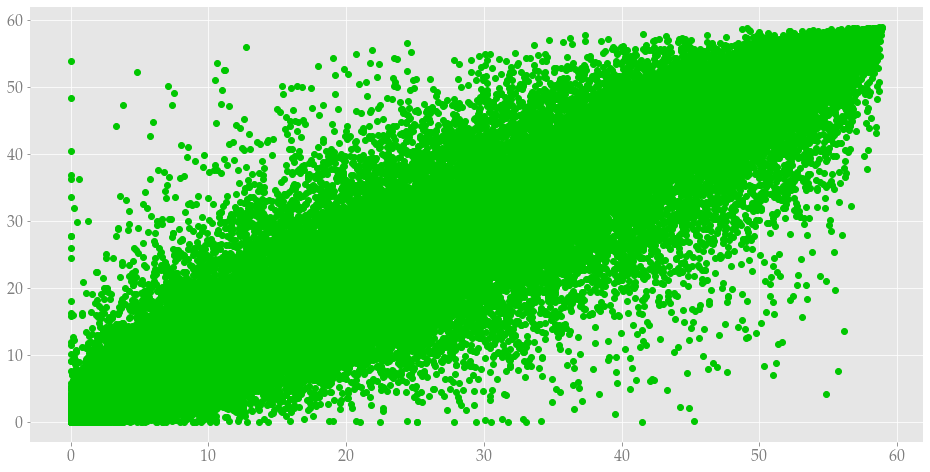

In [58]:
plt.figure(figsize=(16,8))
plt.scatter(X[f'production_{park}'].values, X[f'production_last_hour_{park}'].values)
plt.show()

In [59]:
feature = X[f'wind_speed_{park_name}'].values.reshape(-1, 1)
target = X[f'production_{park}'].values#.reshape(-1, 1)

In [60]:
ransac = RANSACRegressor(random_state=1).fit(feature, target)
ransac_preds = np.ravel(ransac.predict(feature))

huber = HuberRegressor().fit(feature, target)
huber_preds = np.ravel(huber.predict(feature))

linear = LinearRegression().fit(feature, target)
linear_preds = np.ravel(linear.predict(feature))

In [61]:
np.min(X[f'production_{park}'].values), np.max(X[f'production_{park}'].values)

(0.0, 58.93453271484376)

/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/envs/satprod/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


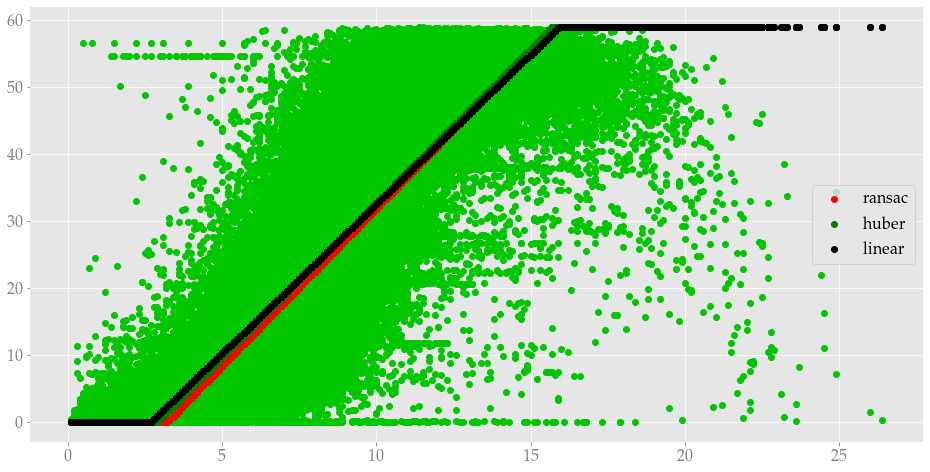

In [62]:
plt.figure(figsize=(16,8))
plt.scatter(
    X[f'wind_speed_{park_name}'], 
    X[f'production_{park}'])
plt.scatter(
    X[f'wind_speed_{park_name}'], 
    np.clip(ransac_preds, np.min(X[f'production_{park}'].values), np.max(X[f'production_{park}'].values)), 
    color='r', label='ransac')
plt.scatter(
    X[f'wind_speed_{park_name}'], 
    np.clip(huber_preds, np.min(X[f'production_{park}'].values), np.max(X[f'production_{park}'].values)), 
    color='g', label='huber')
plt.scatter(
    X[f'wind_speed_{park_name}'], 
    np.clip(linear_preds, np.min(X[f'production_{park}'].values), np.max(X[f'production_{park}'].values)), 
    color='k', label='linear')
plt.legend()
plt.show()

In [63]:
linear.coef_, linear.intercept_

(array([4.45659311]), -12.048667944814383)

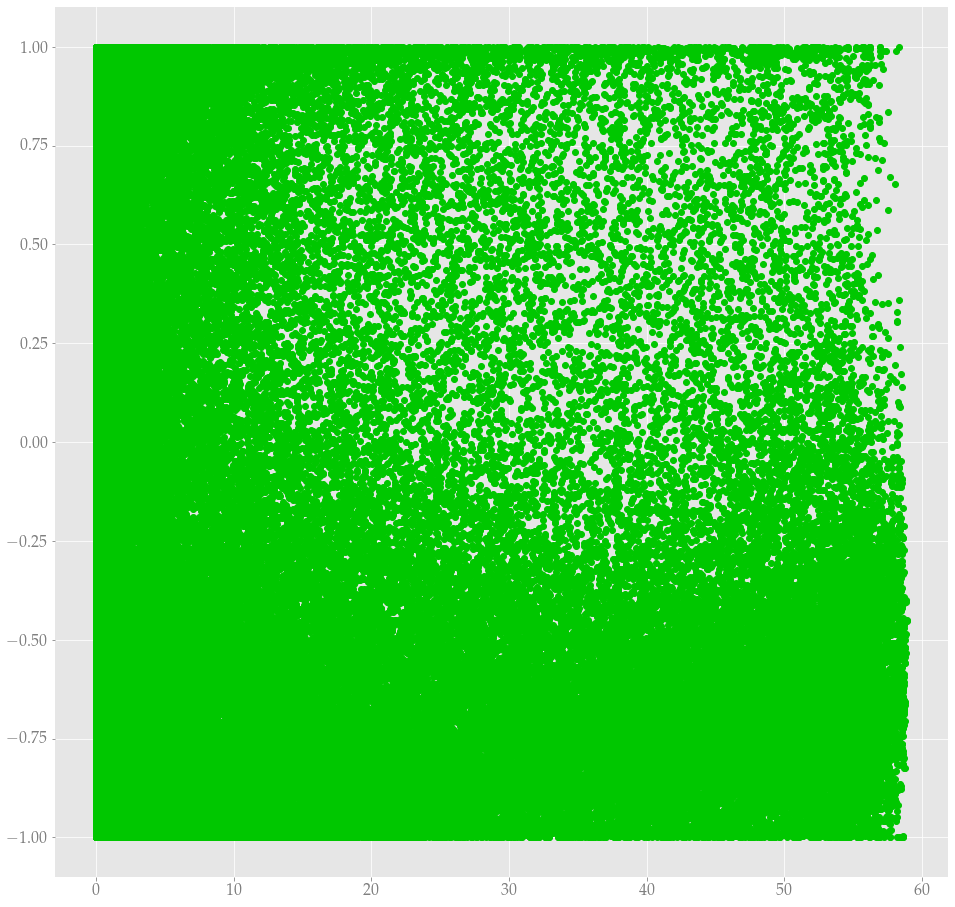

In [64]:
plt.figure(figsize=(16,16))
plt.scatter(X[f'production_{park}'], X[f'wind_direction_{park_name}_cos'])
plt.show()

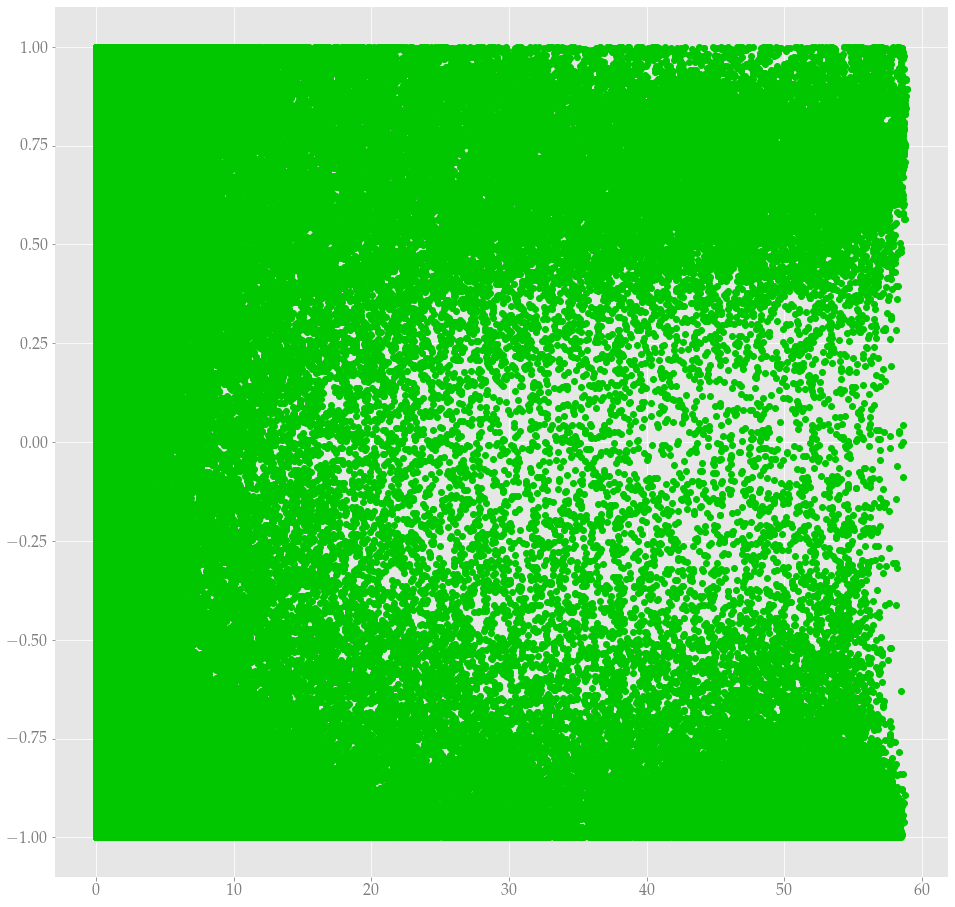

In [65]:
plt.figure(figsize=(16,16))
plt.scatter(X[f'production_{park}'], X[f'wind_direction_{park_name}_sin'])
plt.show()